<b>Libraries used</b>

In [1]:
import pandas as pd
import sqlite3
import pandasql as ps
import numpy as np
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<b>Establishing SQL connection</b>

In [2]:
# Using CSV dataset for trending Youtube videos in India
conn = sqlite3.connect("IN_youtube_trending_data.csv")
cur = conn.cursor()

In [3]:
# Dataframe created
df = pd.read_csv("IN_youtube_trending_data.csv")
df

video_id                                              title  \
0       Iot0eF6EoNA  Sadak 2 | Official Trailer | Sanjay | Pooja | ...   
1       x-KbnJ9fvJc  Kya Baat Aa : Karan Aujla (Official Video) Tan...   
2       KX06ksuS6Xo  Diljit Dosanjh: CLASH (Official) Music Video |...   
3       UsMRgnTcchY  Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...   
4       WNSEXJJhKTU  Baarish (Official Video) Payal Dev,Stebin Ben ...   
...             ...                                                ...   
157167  1QV0eiNFH3g  Thapki Pyar Ki | थपकी प्यार की | Ep. 519 | San...   
157168  NScmlZX6QbQ  Surprise me mummy ne kya dediya 🎉 🎁 happy birt...   
157169  TebOGhonA24  New Shotgun😂 M1014 Overpowered Gameplay Badge9...   
157170  IEsWbluPwQc  വിടമ്മേ ഞാൻ പോട്ടേ 😂 ഇങ്ങനെ ആവണം പെൺകുട്ടികൾ ക...   
157171  rKZd0sbIfQk  Morbi Cable Bridge Collapse : 141 मौतों की वजह...   

                 publishedAt                 channelId  \
0       2020-08-12T04:31:41Z  UCGqvJPRcv7aVFun-eTsatcA   
1       2020-08-11T09:00:11Z  UCm9SZAl03Rev9sFwloCdz1g   
2       2020-08-11T07:30:02Z  UCZRdNleCgW-BGUJf-bbjzQg   
3       2020-08-10T05:30:49Z  UCq-Fj5jknLsUf-MWSy4_brA   
4       2020-08-11T05:30:13Z  UCye6Oz0mg46S362LwARGVcA   
...                      ...                       ...   
157167  2022-11-02T11:15:00Z  UCyfkoMQeJOoEt3ZhY3PI6Uw   
157168  2022-11-01T06:06:52Z  UCMEDV46mTBranzRKnZZplXg   
157169  2022-10-31T07:57:41Z  UCPhZzHKo3Y5YYoazMQWuLTg   
157170  2022-11-01T07:23:50Z  UCZcjeoxG_tu-NvLDH5PTUwg   
157171  2022-10-31T04:49:45Z  UCN7B-QD0Qgn2boVH5Q0pOWg   

                   channelTitle  categoryId         trending_date  \
0                  FoxStarHindi          24  2020-08-12T00:00:00Z   
1                Rehaan Records          10  2020-08-12T00:00:00Z   
2                Diljit Dosanjh          10  2020-08-12T00:00:00Z   
3                      T-Series          10  2020-08-12T00:00:00Z   
4                 VYRLOriginals          10  2020-08-12T00:00:00Z   
...                         ...         ...                   ...   
157167           Colors Rishtey          24  2022-11-04T00:00:00Z   
157168            Muskan Sharma          22  2022-11-04T00:00:00Z   
157169                 Badge 99          20  2022-11-04T00:00:00Z   
157170  T A L K S - LET ME TALK          22  2022-11-04T00:00:00Z   
157171           BBC News Hindi          25  2022-11-04T00:00:00Z   

                                                     tags  view_count   likes  \
0       sadak|sadak 2|mahesh bhatt|vishesh films|pooja...     9885899  224925   
1                                                  [None]    11308046  655450   
2       clash diljit dosanjh|diljit dosanjh|diljit dos...     9140911  296533   
3       hindi songs|2020 hindi songs|2020 new songs|t-...    23564512  743931   
4       VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...     6783649  268817   
...                                                   ...         ...     ...   
157167  thapki pyar ki|Thapki Pyar Ki|थपकी प्यार की|th...      904383    8754   
157168  Muskan sharma vlog|Birthday surprise|surprise ...      832699   32466   
157169  free fire|badge99|new shotgun gameplay|free fi...      990223   98433   
157170                                             [None]      500351    2390   
157171                 BBC Hindi|hindi news|news in hindi    10945108       0   

        dislikes  comment_count  \
0        3979409         350210   
1          33242         405146   
2           6179          30058   
3          84162         136942   
4           8798          22984   
...          ...            ...   
157167         0             67   
157168         0            627   
157169         0           3312   
157170         0            142   
157171         0           5344   

                                        thumbnail_link  comments_disabled  \
0       https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg              False   
1       https://i.ytimg.com/vi/x-KbnJ9fvJc/defau

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157172 entries, 0 to 157171
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           157172 non-null  object
 1   title              157172 non-null  object
 2   publishedAt        157172 non-null  object
 3   channelId          157172 non-null  object
 4   channelTitle       157171 non-null  object
 5   categoryId         157172 non-null  int64 
 6   trending_date      157172 non-null  object
 7   tags               157172 non-null  object
 8   view_count         157172 non-null  int64 
 9   likes              157172 non-null  int64 
 10  dislikes           157172 non-null  int64 
 11  comment_count      157172 non-null  int64 
 12  thumbnail_link     157172 non-null  object
 13  comments_disabled  157172 non-null  bool  
 14  ratings_disabled   157172 non-null  bool  
 15  description        140339 non-null  object
dtypes: bool(2), int64(5)

<b>NORMALIZATION</b> 

Video Dataframe

In [5]:
df_video = df.copy()

In [6]:
df_video.drop(["description","ratings_disabled","thumbnail_link"],axis=1)

video_id                                              title  \
0       Iot0eF6EoNA  Sadak 2 | Official Trailer | Sanjay | Pooja | ...   
1       x-KbnJ9fvJc  Kya Baat Aa : Karan Aujla (Official Video) Tan...   
2       KX06ksuS6Xo  Diljit Dosanjh: CLASH (Official) Music Video |...   
3       UsMRgnTcchY  Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...   
4       WNSEXJJhKTU  Baarish (Official Video) Payal Dev,Stebin Ben ...   
...             ...                                                ...   
157167  1QV0eiNFH3g  Thapki Pyar Ki | थपकी प्यार की | Ep. 519 | San...   
157168  NScmlZX6QbQ  Surprise me mummy ne kya dediya 🎉 🎁 happy birt...   
157169  TebOGhonA24  New Shotgun😂 M1014 Overpowered Gameplay Badge9...   
157170  IEsWbluPwQc  വിടമ്മേ ഞാൻ പോട്ടേ 😂 ഇങ്ങനെ ആവണം പെൺകുട്ടികൾ ക...   
157171  rKZd0sbIfQk  Morbi Cable Bridge Collapse : 141 मौतों की वजह...   

                 publishedAt                 channelId  \
0       2020-08-12T04:31:41Z  UCGqvJPRcv7aVFun-eTsatcA   
1       2020-08-11T09:00:11Z  UCm9SZAl03Rev9sFwloCdz1g   
2       2020-08-11T07:30:02Z  UCZRdNleCgW-BGUJf-bbjzQg   
3       2020-08-10T05:30:49Z  UCq-Fj5jknLsUf-MWSy4_brA   
4       2020-08-11T05:30:13Z  UCye6Oz0mg46S362LwARGVcA   
...                      ...                       ...   
157167  2022-11-02T11:15:00Z  UCyfkoMQeJOoEt3ZhY3PI6Uw   
157168  2022-11-01T06:06:52Z  UCMEDV46mTBranzRKnZZplXg   
157169  2022-10-31T07:57:41Z  UCPhZzHKo3Y5YYoazMQWuLTg   
157170  2022-11-01T07:23:50Z  UCZcjeoxG_tu-NvLDH5PTUwg   
157171  2022-10-31T04:49:45Z  UCN7B-QD0Qgn2boVH5Q0pOWg   

                   channelTitle  categoryId         trending_date  \
0                  FoxStarHindi          24  2020-08-12T00:00:00Z   
1                Rehaan Records          10  2020-08-12T00:00:00Z   
2                Diljit Dosanjh          10  2020-08-12T00:00:00Z   
3                      T-Series          10  2020-08-12T00:00:00Z   
4                 VYRLOriginals          10  2020-08-12T00:00:00Z   
...                         ...         ...                   ...   
157167           Colors Rishtey          24  2022-11-04T00:00:00Z   
157168            Muskan Sharma          22  2022-11-04T00:00:00Z   
157169                 Badge 99          20  2022-11-04T00:00:00Z   
157170  T A L K S - LET ME TALK          22  2022-11-04T00:00:00Z   
157171           BBC News Hindi          25  2022-11-04T00:00:00Z   

                                                     tags  view_count   likes  \
0       sadak|sadak 2|mahesh bhatt|vishesh films|pooja...     9885899  224925   
1                                                  [None]    11308046  655450   
2       clash diljit dosanjh|diljit dosanjh|diljit dos...     9140911  296533   
3       hindi songs|2020 hindi songs|2020 new songs|t-...    23564512  743931   
4       VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...     6783649  268817   
...                                                   ...         ...     ...   
157167  thapki pyar ki|Thapki Pyar Ki|थपकी प्यार की|th...      904383    8754   
157168  Muskan sharma vlog|Birthday surprise|surprise ...      832699   32466   
157169  free fire|badge99|new shotgun gameplay|free fi...      990223   98433   
157170                                             [None]      500351    2390   
157171                 BBC Hindi|hindi news|news in hindi    10945108       0   

        dislikes  comment_count  comments_disabled  
0        3979409         350210              False  
1          33242         405146              False  
2           6179          30058              False  
3          84162         136942              False  
4           8798          22984              False  
...          ...            ...                ...  
157167         0             67              False  
157168         0            627              False  
157169         0           3312              False  
157170         0            142              False  
157171         0           5344         

Category Dataframe

In [7]:
df_category = df.copy()

In [8]:
# Creating dictionary for category ID(Keys) and category name(values)
category = {"1":"Film & Animation",
           "2":"Autos & Vehicles",
           "10":"Music",
           "15":"Pets & Animals",
           "17":"Sports",
           "18":"Short Movies",
           "19":"Travel & Events",
           "20":"Gaming",
           "21":"Videoblogging",
           "22":"People & Blogs",
           "23":"Comedy",
           "24":"Entertainment",
           "25":"News & Politics",
           "26":"Howto & Style",
           "27":"Education",
           "28":"Science & Technology",
           "29":"Nonprofits & Activism",
           "30":"Movies",
           "31":"Anime/Animation",
           "32":"Action/Adventure",
           "33":"Classics",
           "35":"Documentary",
           "36":"Drama",
           "37":"Family",
           "38":"Foreign",
           "39":"Horror",
           "40":"Sci-Fi/Fantasy",
           "41":"Thriller",
           "42":"Shorts",
           "43":"Shows",
           "44":"Trailers"}

In [9]:
df_category = pd.DataFrame({'category_id': category.keys(), 'category_name': category.values()})

In [10]:
df_category["most_viewed_video_id"] = "Enter ID of video"
df_category["most_viewed_video"] = "Enter Title of video"
df_category["trending_date"] = "Date of video"
df_category["total_views"] = "Total views of that category"

<b>Queries</b>

In [11]:
# Query returning video_id, channelId, categoryId, and view_count
q1 = """SELECT video_id, channelId, categoryId, view_count FROM df_video ORDER BY view_count desc """
print(ps.sqldf(q1, locals()))

           video_id                 channelId  categoryId  view_count
0       WMweEpGlu_U  UC3IZKseVpdzPSBaWxBxundA          10   264407389
1       gdZLi9oWNZg  UC3IZKseVpdzPSBaWxBxundA          10   253995993
2       gdZLi9oWNZg  UC3IZKseVpdzPSBaWxBxundA          10   244507902
3       gdZLi9oWNZg  UC3IZKseVpdzPSBaWxBxundA          10   232649205
4       gdZLi9oWNZg  UC3IZKseVpdzPSBaWxBxundA          10   219110491
...             ...                       ...         ...         ...
157167  BxOEj8ZeX2g  UCdq61m8s_48EhJ5OM_MCeGw           1           0
157168  Isim0ysZ6X4  UCdq61m8s_48EhJ5OM_MCeGw           1           0
157169  Isim0ysZ6X4  UCdq61m8s_48EhJ5OM_MCeGw           1           0
157170  Isim0ysZ6X4  UCdq61m8s_48EhJ5OM_MCeGw           1           0
157171  Isim0ysZ6X4  UCdq61m8s_48EhJ5OM_MCeGw           1           0

[157172 rows x 4 columns]


In [12]:
# Most viewed video ID (category wise)
q2 = """SELECT video_id FROM df_video group by categoryId HAVING MAX(view_count) ORDER BY categoryId """

vidID = ps.sqldf(q2, locals())
idlist = vidID["video_id"].tolist()
idlist.insert(5,np.nan)
idlist.insert(9,np.nan)

for i in range(14):
    idlist.append(np.nan)


In [13]:
df_category["most_viewed_video_id"] = idlist

In [14]:
# Most viewed video title (category wise)
q3 = """SELECT title FROM df_video group by categoryId HAVING MAX(view_count) ORDER BY categoryId """

vidName = ps.sqldf(q3, locals())
namelist = vidName["title"].tolist()
namelist.insert(5,np.nan)
namelist.insert(9,np.nan)
for i in range(14):
    namelist.append(np.nan)


In [15]:
df_category["most_viewed_video"] = namelist

In [16]:
# Most viewed video trending date (category wise)
q4 = """SELECT trending_date FROM df_video group by categoryId HAVING MAX(view_count) ORDER BY categoryId """

vidDate = ps.sqldf(q4, locals())
datelist = vidDate["trending_date"].tolist()
datelist.insert(5,np.nan)
datelist.insert(9,np.nan)
for i in range(14):
    datelist.append(np.nan)

In [17]:
df_category["trending_date"] = pd.to_datetime(datelist)

In [18]:
df_category["trending_date"] = df_category.trending_date.dt.date

In [19]:
# Most viewed video view count (category wise) 
q5 = """SELECT SUM(view_count) AS view FROM df_video GROUP BY categoryId ORDER BY categoryId"""

views = ps.sqldf(q5, locals())
viewlist = views["view"].tolist()
viewlist.insert(5,np.nan)
viewlist.insert(9,np.nan)
for i in range(14):
    viewlist.append(np.nan)

In [20]:
df_category["total_views"] = viewlist

In [21]:
df_category

category_id          category_name most_viewed_video_id  \
0            1       Film & Animation          JKa05nyUmuQ   
1            2       Autos & Vehicles          4oTE4VHnJvg   
2           10                  Music          WMweEpGlu_U   
3           15         Pets & Animals          e6suFNbou5Y   
4           17                 Sports          gdsUKphmB3Y   
5           18           Short Movies                  NaN   
6           19        Travel & Events          xOsRn60z_Ik   
7           20                 Gaming          qpw5i2j6cHc   
8           21          Videoblogging          QyEiXDIcWrA   
9           22         People & Blogs                  NaN   
10          23                 Comedy          twuYIuJlMF0   
11          24          Entertainment          Qah9sSIXJqk   
12          25        News & Politics          myjEoDypUD8   
13          26          Howto & Style          CSMWFELf5UY   
14          27              Education          ia6fRSeK8I0   
15          28   Science & Technology          KR0g-1hnQPA   
16          29  Nonprofits & Activism          ZvaWDFwjDcI   
17          30                 Movies                  NaN   
18          31        Anime/Animation                  NaN   
19          32       Action/Adventure                  NaN   
20          33               Classics                  NaN   
21          35            Documentary                  NaN   
22          36                  Drama                  NaN   
23          37                 Family                  NaN   
24          38                Foreign                  NaN   
25          39                 Horror                  NaN   
26          40         Sci-Fi/Fantasy                  NaN   
27          41               Thriller                  NaN   
28          42                 Shorts                  NaN   
29          43                  Shows                  NaN   
30          44               Trailers                  NaN   

                                    most_viewed_video trending_date  \
0   KGF Chapter 2 Trailer|Hindi|Yash|Sanjay Dutt|R...    2022-04-05   
1   😬Bike vs Man challange😍😍😍#ytshortsindia #usa_s...    2021-11-10   
2                    BTS (방탄소년단) 'Butter' Official MV    2021-05-30   
3   Oddly satisfying 🤪🤪🤪 Kids don’t try at home #t...    2022-07-11   
4   Dr. Dre, Snoop Dogg, Eminem, Mary J. Blige & K...    2022-02-18   
5                                                 NaN           NaT   
6   “Bhai ka farz har kadam pe🙏” #littleglove #ash...    2022-08-18   
7                   Money Plinko Challenge! 💰 #shorts    2021-05-23   
8             Paytm IPL 2021 Ad - The Salon (English)    2021-06-14   
9                                                 NaN           NaT   
10   OMG Hot burger! 😂 #shorts Best video by MoniLina    2021-12-14   
11  KGF Chapter2 TEASER |Yash|Sanjay Dutt|Raveena ...    2021-01-18   
12  Watch the uncensored moment Will Smith smacks ...    2022-04-04   
13  Betiyaan kisi se kam nahi hoti || Gulshan kalr...    2022-02-10   
14                 jai shree ram 🚩#shorts #ashortaday    2022-03-25   
15                           Apple Event — October 13    2020-10-19   
16                      Yes or No Challenge 😂 #shorts    2021-07-22   
17                                                NaN           NaT   
18                                                NaN           NaT   
19                                                NaN           NaT   
20                                                NaN           NaT   
21                                                NaN           NaT   
22                                                NaN           NaT   
23                                                NaN           NaT   
24                                                NaN           NaT   
25                                                NaN           NaT   
26                                                NaN           NaT   
27                            

In [22]:
df_category_1= df.groupby(by = df_category['category_name']).sum()

In [23]:
df_category_1

categoryId  view_count   likes  dislikes  \
category_name                                                     
Action/Adventure               17     4387126   79477      4363   
Anime/Animation                10     4229128   97070     44142   
Autos & Vehicles               10    11308046  655450     33242   
Classics                       23      352216   34674       705   
Comedy                         23    10080580  834240     26317   
Documentary                    24     1584985   12488      2099   
Drama                          24     5074028   82719      5081   
Education                      24    13210819   18787     21210   
Entertainment                  23     1096906   62388      4337   
Family                         24     3385984  183646     13288   
Film & Animation               24     9885899  224925   3979409   
Foreign                        22     4356422  438816      6332   
Gaming                         24     3816680   30086      6786   
Horror                         24      233429   30260       488   
Howto & Style                  22     1105741   84592      2590   
Movies                         10     2811249  113078      9661   
Music                          10     9140911  296533      6179   
News & Politics                22     1212997  110209      2391   
Nonprofits & Activism          24     1549015  210151      2682   
People & Blogs                 10     1466612   97192      2276   
Pets & Animals                 10    23564512  743931     84162   
Sci-Fi/Fantasy                 22      848286   58734      1284   
Science & Technology           25     1435833   35068      1450   
Short Movies                   20     1699326  332553      4627   
Shorts                         10     6714375  202020      3656   
Shows                           1      766658   70544      1456   
Sports                         10     6783649  268817      8798   
Thriller                       22     2630459  134126      4954   
Trailers                       26      424680    7369       854   
Travel & Events                10     7363779  301888     13836   
Videoblogging                  24      837562   21510      2290   

                       comment_count  comments_disabled  ratings_disabled  
category_name                                                              
Action/Adventure                2949                  0                 0  
Anime/Animation                21232                  0                 0  
Autos & Vehicles              405146                  0                 0  
Classics                        2503                  0                 0  
Comedy                        324353                  0                 0  
Documentary                     1084                  0                 0  
Drama                           2852                  0                 0  
Education                          0                  1                 0  
Entertainment                   4443                  0                 0  
Family                          9337                  0                 0  
Film & Animation              350210                  0                 0  
Foreign                        47039                  0                 0  
Gaming                          3733                  0                 0  
Horror                          3425                  0                 0  
Howto & Style                   5021                  0                 0  
Movies                          5169                  0                 0  
Music                          30058                  0                 0  
News & Politics                 4131                  0                 0  
Nonprofits & Activism         140543                  0                 0  
People & Blogs                  3311                  0                 0  
Pets & Animals                136942                  0                 0  
Sci-Fi/Fantasy                  1546                  0        

Visualization of view count, likes, dislikes and comment count (category wise)

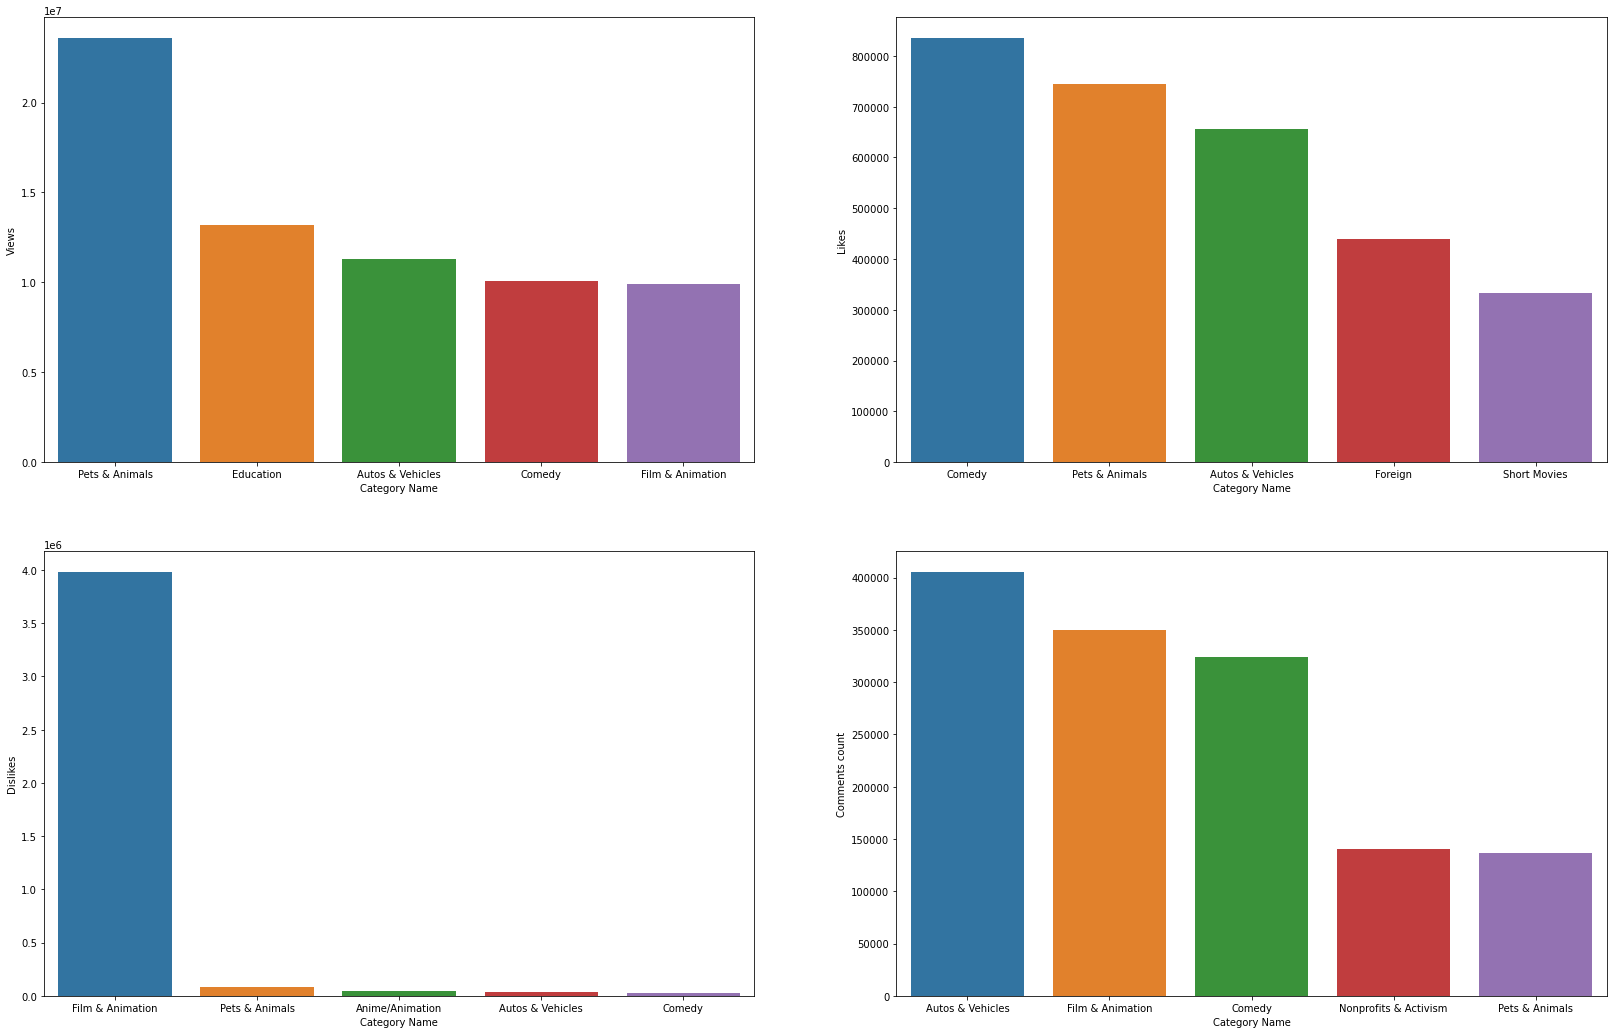

In [24]:
# Bar graph
plt.figure(figsize = (28,18))
plt.subplot(2,2,1)

cols = ['view_count','likes','dislikes','comment_count']
y_axis = ['Views','Likes','Dislikes','Comments count']
for i in range(0,4):
    plt.subplot(2,2,i+1)
    x = df_category_1[cols[i]].nlargest(5).index
    y = df_category_1[cols[i]].nlargest(5)
    sns.barplot(x = x,y = y)
    plt.ylabel(y_axis[i])
    plt.xlabel("Category Name")

In [25]:
# Tree map graph(category wise)
fig = px.treemap(df_category, path=[px.Constant('Category Name'), 'category_name'],
                 values=df_category['total_views'],
                 color=df_category['total_views'],
                 color_continuous_scale='viridis_r',
                 color_continuous_midpoint=np.average(df_category['total_views'])
                )

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Channel Dataframe

In [26]:
df_channel = pd.DataFrame({"channel_id":df["channelId"], "channel_title":df["channelTitle"]})

In [27]:
df_channel

channel_id            channel_title
0       UCGqvJPRcv7aVFun-eTsatcA             FoxStarHindi
1       UCm9SZAl03Rev9sFwloCdz1g           Rehaan Records
2       UCZRdNleCgW-BGUJf-bbjzQg           Diljit Dosanjh
3       UCq-Fj5jknLsUf-MWSy4_brA                 T-Series
4       UCye6Oz0mg46S362LwARGVcA            VYRLOriginals
...                          ...                      ...
157167  UCyfkoMQeJOoEt3ZhY3PI6Uw           Colors Rishtey
157168  UCMEDV46mTBranzRKnZZplXg            Muskan Sharma
157169  UCPhZzHKo3Y5YYoazMQWuLTg                 Badge 99
157170  UCZcjeoxG_tu-NvLDH5PTUwg  T A L K S - LET ME TALK
157171  UCN7B-QD0Qgn2boVH5Q0pOWg           BBC News Hindi

[157172 rows x 2 columns]

In [28]:
df_channel_1 = df.groupby(by = df['channelId']).sum()
df_channel_1[df_channel_1['view_count'] == df_channel_1['view_count'].max()]

categoryId   view_count      likes  dislikes  \
channelId                                                                
UCq-Fj5jknLsUf-MWSy4_brA        7457  17392848249  532637187  19816336   

                          comment_count  comments_disabled  ratings_disabled  
channelId                                                                     
UCq-Fj5jknLsUf-MWSy4_brA       37302497                  0                 1

In [29]:
df_channel_1 = df.groupby(by = df['channelId']).sum()
df_channel_1[df_channel_1['view_count'] == df_channel_1['view_count']]

categoryId  view_count     likes  dislikes  \
channelId                                                              
UC--MSNrR_zO4Zb5OvwjWF4A          81      281446      9494         0   
UC--bUZc5c9WseZNqGR6KLxA         558    23851057    615835     13175   
UC-0BEkoJfYDvaOHKsY1Lseg         984     4486579    249975      8967   
UC-0UdGMHGwl4WrNUzHQEDSA        1288    15050529   2510554      2438   
UC-1bZnPu_ElkbrO55bMHHsA          20      484546     19712       589   
...                              ...         ...       ...       ...   
UCzsNLZ9GrGXRjt0QmvWFm2Q        3271   220044599  16190139    116043   
UCzsmswH4gFFdtbCfOijSTTw         456    33087186   2408027     62800   
UCzt3wUqBZsIUYeRDIaIMF8w         100    15842435    224095      1709   
UCzxfpzSF7mz8j7bNIXyZWmA           1       26318       879        46   
UCzzdypcn26RPRV6bIJIp0CA         240    14936171   1031895     22622   

                          comment_count  comments_disabled  ratings_disabled  
channelId                                                                     
UC--MSNrR_zO4Zb5OvwjWF4A           1777                  0                 0  
UC--bUZc5c9WseZNqGR6KLxA          45490                  0                 0  
UC-0BEkoJfYDvaOHKsY1Lseg          42576                  0                 0  
UC-0UdGMHGwl4WrNUzHQEDSA         104620                  0                 0  
UC-1bZnPu_ElkbrO55bMHHsA            386                  0                 0  
...                                 ...                ...               ...  
UCzsNLZ9GrGXRjt0QmvWFm2Q         216463                  6                 1  
UCzsmswH4gFFdtbCfOijSTTw         105976                  0                 0  
UCzt3wUqBZsIUYeRDIaIMF8w          16903                  0                 0  
UCzxfpzSF7mz8j7bNIXyZWmA             10                  0                 0  
UCzzdypcn26RPRV6bIJIp0CA           3234                  0                 0  

[3926 rows x 7 columns]

In [30]:
df_channel_1 = df_channel_1.drop("ratings_disabled", axis=1)

In [31]:
df_channel.drop_duplicates('channel_title',keep='last')

channel_id            channel_title
146     UCZ-jNKpll-3DPV4v4hc6ojw        Tru Music Studios
152     UC9-eoxoyevtmi73qPRqJwUA            Kuldeep M Pai
162     UCS4oJeUrEtPcTqF9NiZsUjQ      Amrutha Productions
167     UC9pRPRlo6wIOakEOi_2RWwA                   Ir Wog
310     UCZxqtFjlsuEJMCN-c7agBRQ             Tolly Masthi
...                          ...                      ...
157167  UCyfkoMQeJOoEt3ZhY3PI6Uw           Colors Rishtey
157168  UCMEDV46mTBranzRKnZZplXg            Muskan Sharma
157169  UCPhZzHKo3Y5YYoazMQWuLTg                 Badge 99
157170  UCZcjeoxG_tu-NvLDH5PTUwg  T A L K S - LET ME TALK
157171  UCN7B-QD0Qgn2boVH5Q0pOWg           BBC News Hindi

[4064 rows x 2 columns]

In [32]:
df_channel_1 = df.groupby(by = df['channelTitle']).sum()
df_channel_1[df_channel_1['view_count']==df_channel_1['view_count'].max()]

categoryId   view_count      likes  dislikes  comment_count  \
channelTitle                                                                
T-Series            7457  17392848249  532637187  19816336       37302497   

              comments_disabled  ratings_disabled  
channelTitle                                       
T-Series                      0                 1

In [33]:
df_channel_1

categoryId  view_count     likes  dislikes  \
channelTitle                                                           
#RohiL Fitness Yug                68     2741126     51353      5153   
0300 Brotherhood Records          40     4930459    145855         0   
1 Million Views Tamil           1518   107724641  10316469     43856   
1.1 Gaming                       260     7581121    351014     32492   
10 Mint Records                   50     4285070    438673      9285   
...                              ...         ...       ...       ...   
ਪੰਜਾਬੀ ਲੋਕ Punjabi Lok           175     4108993    136619      5510   
తెలుగు రైతుబడి                   110     8556720    356449         0   
ಉದ್ಯೋಗ ಮಿತ್ರ                      81       60956      2513       162   
ആവൂസ് avoosss family             792    55219860   1438850         0   
ജോഷ് Talks                       704     8614324    445657     10530   

                          comment_count  comments_disabled  ratings_disabled  
channelTitle                                                                  
#RohiL Fitness Yug                  565                  0                 0  
0300 Brotherhood Records          23055                  0                 0  
1 Million Views Tamil             12791                  0                 0  
1.1 Gaming                        21530                  0                 0  
10 Mint Records                   23159                  0                 0  
...                                 ...                ...               ...  
ਪੰਜਾਬੀ ਲੋਕ Punjabi Lok            11804                  0                 0  
తెలుగు రైతుబడి                      854                  0                 0  
ಉದ್ಯೋಗ ಮಿತ್ರ                        266                  0                 0  
ആവൂസ് avoosss family               3005                  7                 0  
ജോഷ് Talks                        36119                  0                 0  

[4063 rows x 7 columns]

Visualization of view count, likes, dislikes and comment count (channel wise)

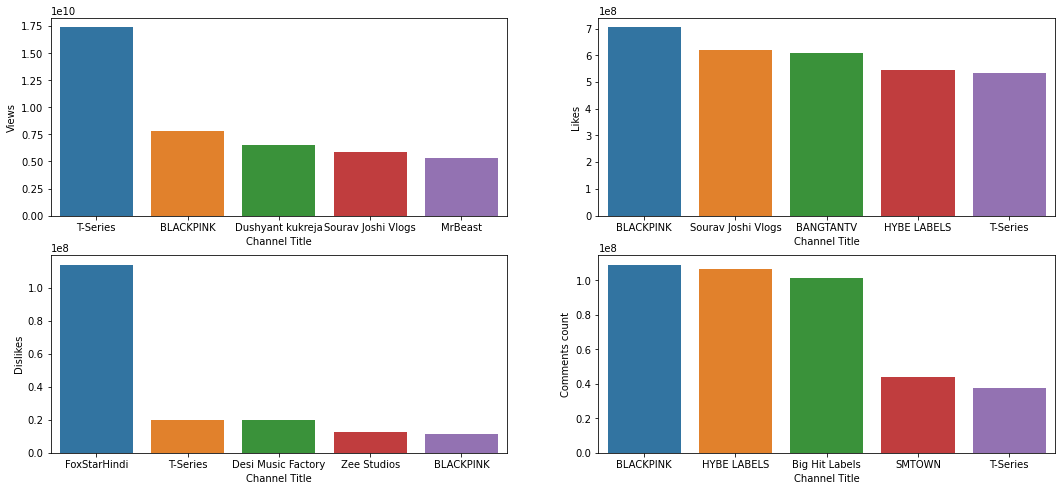

In [34]:
# Bar graph
plt.figure(figsize = (18,8))
plt.subplot(2,2,1)

cols = ['view_count','likes','dislikes','comment_count']
y_axis = ['Views','Likes','Dislikes','Comments count']

for i in range(0,4):
    plt.subplot(2,2,i+1)
    x = df_channel_1[cols[i]].nlargest(5).index
    y = df_channel_1[cols[i]].nlargest(5)
    sns.barplot(x = x,y = y)
    plt.ylabel(y_axis[i])
    plt.xlabel("Channel Title")

Trending Data Dataframe

In [35]:
df_trending = df.copy()
df_trending['trending_date'] = pd.to_datetime(df['trending_date'])
df_trending['year'], df_trending['month'] = df_trending['trending_date'].dt.year, df_trending['trending_date'].dt.month
df_trending

video_id                                              title  \
0       Iot0eF6EoNA  Sadak 2 | Official Trailer | Sanjay | Pooja | ...   
1       x-KbnJ9fvJc  Kya Baat Aa : Karan Aujla (Official Video) Tan...   
2       KX06ksuS6Xo  Diljit Dosanjh: CLASH (Official) Music Video |...   
3       UsMRgnTcchY  Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...   
4       WNSEXJJhKTU  Baarish (Official Video) Payal Dev,Stebin Ben ...   
...             ...                                                ...   
157167  1QV0eiNFH3g  Thapki Pyar Ki | थपकी प्यार की | Ep. 519 | San...   
157168  NScmlZX6QbQ  Surprise me mummy ne kya dediya 🎉 🎁 happy birt...   
157169  TebOGhonA24  New Shotgun😂 M1014 Overpowered Gameplay Badge9...   
157170  IEsWbluPwQc  വിടമ്മേ ഞാൻ പോട്ടേ 😂 ഇങ്ങനെ ആവണം പെൺകുട്ടികൾ ക...   
157171  rKZd0sbIfQk  Morbi Cable Bridge Collapse : 141 मौतों की वजह...   

                 publishedAt                 channelId  \
0       2020-08-12T04:31:41Z  UCGqvJPRcv7aVFun-eTsatcA   
1       2020-08-11T09:00:11Z  UCm9SZAl03Rev9sFwloCdz1g   
2       2020-08-11T07:30:02Z  UCZRdNleCgW-BGUJf-bbjzQg   
3       2020-08-10T05:30:49Z  UCq-Fj5jknLsUf-MWSy4_brA   
4       2020-08-11T05:30:13Z  UCye6Oz0mg46S362LwARGVcA   
...                      ...                       ...   
157167  2022-11-02T11:15:00Z  UCyfkoMQeJOoEt3ZhY3PI6Uw   
157168  2022-11-01T06:06:52Z  UCMEDV46mTBranzRKnZZplXg   
157169  2022-10-31T07:57:41Z  UCPhZzHKo3Y5YYoazMQWuLTg   
157170  2022-11-01T07:23:50Z  UCZcjeoxG_tu-NvLDH5PTUwg   
157171  2022-10-31T04:49:45Z  UCN7B-QD0Qgn2boVH5Q0pOWg   

                   channelTitle  categoryId             trending_date  \
0                  FoxStarHindi          24 2020-08-12 00:00:00+00:00   
1                Rehaan Records          10 2020-08-12 00:00:00+00:00   
2                Diljit Dosanjh          10 2020-08-12 00:00:00+00:00   
3                      T-Series          10 2020-08-12 00:00:00+00:00   
4                 VYRLOriginals          10 2020-08-12 00:00:00+00:00   
...                         ...         ...                       ...   
157167           Colors Rishtey          24 2022-11-04 00:00:00+00:00   
157168            Muskan Sharma          22 2022-11-04 00:00:00+00:00   
157169                 Badge 99          20 2022-11-04 00:00:00+00:00   
157170  T A L K S - LET ME TALK          22 2022-11-04 00:00:00+00:00   
157171           BBC News Hindi          25 2022-11-04 00:00:00+00:00   

                                                     tags  view_count   likes  \
0       sadak|sadak 2|mahesh bhatt|vishesh films|pooja...     9885899  224925   
1                                                  [None]    11308046  655450   
2       clash diljit dosanjh|diljit dosanjh|diljit dos...     9140911  296533   
3       hindi songs|2020 hindi songs|2020 new songs|t-...    23564512  743931   
4       VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...     6783649  268817   
...                                                   ...         ...     ...   
157167  thapki pyar ki|Thapki Pyar Ki|थपकी प्यार की|th...      904383    8754   
157168  Muskan sharma vlog|Birthday surprise|surprise ...      832699   32466   
157169  free fire|badge99|new shotgun gameplay|free fi...      990223   98433   
157170                                             [None]      500351    2390   
157171                 BBC Hindi|hindi news|news in hindi    10945108       0   

        dislikes  comment_count  \
0        3979409         350210   
1          33242         405146   
2           6179          30058   
3          84162         136942   
4           8798          22984   
...          ...            ...   
157167         0             67   
157168         0            627   
157169         0           3312   
157170         0            142   
157171         0           5344   

                                        thumbnail_link  comments_disabled  \
0       https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg              False   


In [36]:
# Yearly most viewed video
q2020 = """SELECT year, month, trending_date, video_id, title, channelId, categoryId, MAX(view_count) FROM df_trending WHERE trending_date LIKE '2020%' """
q2021 = """SELECT year, month, trending_date, video_id, title, channelId, categoryId, MAX(view_count) FROM df_trending WHERE trending_date LIKE '2021%' """
q2022 = """SELECT year, month, trending_date, video_id, title, channelId, categoryId, MAX(view_count) FROM df_trending WHERE trending_date LIKE '2022%' """

views0 = ps.sqldf(q2020, locals())
views1 = ps.sqldf(q2021, locals())
views2 = ps.sqldf(q2022, locals())

In [37]:
views0

year  month               trending_date     video_id  \
0  2020      8  2020-08-30 00:00:00.000000  gdZLi9oWNZg   

                                title                 channelId  categoryId  \
0  BTS (방탄소년단) 'Dynamite' Official MV  UC3IZKseVpdzPSBaWxBxundA          10   

   MAX(view_count)  
0        253995993

In [38]:
views1

year  month               trending_date     video_id  \
0  2021      5  2021-05-30 00:00:00.000000  WMweEpGlu_U   

                              title                 channelId  categoryId  \
0  BTS (방탄소년단) 'Butter' Official MV  UC3IZKseVpdzPSBaWxBxundA          10   

   MAX(view_count)  
0        264407389

In [39]:
views2

year  month               trending_date     video_id  \
0  2022      8  2022-08-25 00:00:00.000000  gQlMMD8auMs   

                          title                 channelId  categoryId  \
0  BLACKPINK - ‘Pink Venom’ M/V  UCOmHUn--16B90oW2L6FRR3A          10   

   MAX(view_count)  
0        187922090

In [40]:
# Combining dataframes
views = pd.concat([views0, views1, views2], axis=0, ignore_index=True)
views

year  month               trending_date     video_id  \
0  2020      8  2020-08-30 00:00:00.000000  gdZLi9oWNZg   
1  2021      5  2021-05-30 00:00:00.000000  WMweEpGlu_U   
2  2022      8  2022-08-25 00:00:00.000000  gQlMMD8auMs   

                                title                 channelId  categoryId  \
0  BTS (방탄소년단) 'Dynamite' Official MV  UC3IZKseVpdzPSBaWxBxundA          10   
1    BTS (방탄소년단) 'Butter' Official MV  UC3IZKseVpdzPSBaWxBxundA          10   
2        BLACKPINK - ‘Pink Venom’ M/V  UCOmHUn--16B90oW2L6FRR3A          10   

   MAX(view_count)  
0        253995993  
1        264407389  
2        187922090

In [41]:
# Monthly most viewed videos
qMonth20 = """SELECT year, month, trending_date, video_id, title, channelId, categoryId, view_count FROM df_trending WHERE year = '2020' GROUP BY month Having max(view_count)"""
qMonth21 = """SELECT year, month, trending_date, video_id, title, channelId, categoryId, view_count FROM df_trending WHERE year = '2021' GROUP BY month Having max(view_count)"""
qMonth22 = """SELECT year, month, trending_date, video_id, title, channelId, categoryId, view_count FROM df_trending WHERE year = '2022' GROUP BY month Having max(view_count)"""

viewsM20 = ps.sqldf(qMonth20, locals())
viewsM21 = ps.sqldf(qMonth21, locals())
viewsM22 = ps.sqldf(qMonth22, locals())

In [42]:
viewsM20

year  month               trending_date     video_id  \
0  2020      8  2020-08-30 00:00:00.000000  gdZLi9oWNZg   
1  2020      9  2020-09-05 00:00:00.000000  vRXZj0DzXIA   
2  2020     10  2020-10-09 00:00:00.000000  dyRsYk0LyA8   
3  2020     11  2020-11-28 00:00:00.000000  -5q5mZbe3V8   
4  2020     12  2020-12-18 00:00:00.000000  EsXG4YET4zs   

                                               title  \
0                 BTS (방탄소년단) 'Dynamite' Official MV   
1    BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V   
2                   BLACKPINK – ‘Lovesick Girls’ M/V   
3             BTS (방탄소년단) 'Life Goes On' Official MV   
4  Husnn Hai Suhaana New - Coolie No.1| VarunDhaw...   

                  channelId  categoryId  view_count  
0  UC3IZKseVpdzPSBaWxBxundA          10   253995993  
1  UCOmHUn--16B90oW2L6FRR3A          10   184778248  
2  UCOmHUn--16B90oW2L6FRR3A          10   140685439  
3  UC3IZKseVpdzPSBaWxBxundA          10   150622781  
4  UCJrDMFOdv1I2k8n9oK_V21w          10    73966668

In [43]:
viewsM21

year  month               trending_date     video_id  \
0   2021      1  2021-01-18 00:00:00.000000  Qah9sSIXJqk   
1   2021      2  2021-02-26 00:00:00.000000  sCbbMZ-q4-I   
2   2021      3  2021-03-18 00:00:00.000000  CKZvWhCqx1s   
3   2021      4  2021-04-15 00:00:00.000000  qaA28VO9yH4   
4   2021      5  2021-05-30 00:00:00.000000  WMweEpGlu_U   
5   2021      6  2021-06-14 00:00:00.000000  QyEiXDIcWrA   
6   2021      7  2021-07-16 00:00:00.000000  DUwlGduupRI   
7   2021      8  2021-08-29 00:00:00.000000  dvA6CwbNWig   
8   2021      9  2021-09-17 00:00:00.000000  awkkyBH2zEo   
9   2021     10  2021-10-02 00:00:00.000000  FxIgRAbxnxk   
10  2021     11  2021-11-30 00:00:00.000000  0e3GPea1Tyg   
11  2021     12  2021-12-01 00:00:00.000000  0e3GPea1Tyg   

                                                title  \
0   KGF Chapter2 TEASER |Yash|Sanjay Dutt|Raveena ...   
1   Lut Gaye (Full Song) Emraan Hashmi, Yukti | Ju...   
2                          ROSÉ - 'On The Ground' M/V   
3                       8 Year Old Loses His Mind! 🤣😱   
4                    BTS (방탄소년단) 'Butter' Official MV   
5             Paytm IPL 2021 Ad - The Salon (English)   
6   Filhaal2 Mohabbat | Akshay Kumar Ft Nupur Sano...   
7   Don’t be Oversmart 😎 ~ You Can’t Change your D...   
8                                 LISA - 'LALISA' M/V   
9   Insaniyat shayad ab bachho me he rah gai hai 😭...   
10                  $456,000 Squid Game In Real Life!   
11                  $456,000 Squid Game In Real Life!   

                   channelId  categoryId  view_count  
0   UCarJoVXH0T2pdtcHBu9J8Bw          24   156704924  
1   UCq-Fj5jknLsUf-MWSy4_brA          10    75471473  
2   UCOmHUn--16B90oW2L6FRR3A          10    94356729  
3   UCDgNRuWdouD-dXgrM3fF41Q          22    98126454  
4   UC3IZKseVpdzPSBaWxBxundA          10   264407389  
5   UCXDY2FHLmmMQ2dacN9Jb8mA          22   141191928  
6   UC783dnzJqf2ghHp_pFLYbGA          10   202091414  
7   UCo6y9hnRawAqtyWhRhblXqg          24   100949001  
8   UCOmHUn--16B90oW2L6FRR3A          10   161848202  
9   UCunqjMN6EEbXjzU-RvwJrig          23    74239290  
10  UCX6OQ3DkcsbYNE6H8uQQuVA          24   122021654  
11  UCX6OQ3DkcsbYNE6H8uQQuVA          24   130743617

In [44]:
viewsM22

year  month               trending_date     video_id  \
0   2022      1  2022-01-15 00:00:00.000000  2O4mSNA6IQE   
1   2022      2  2022-02-23 00:00:00.000000  8FAUEv_E_xQ   
2   2022      3  2022-03-25 00:00:00.000000  ia6fRSeK8I0   
3   2022      4  2022-04-04 00:00:00.000000  myjEoDypUD8   
4   2022      5  2022-05-22 00:00:00.000000  6WhhywlTVC0   
5   2022      6  2022-06-16 00:00:00.000000  kXpOEzNZ8hQ   
6   2022      7  2022-07-11 00:00:00.000000  e6suFNbou5Y   
7   2022      8  2022-08-25 00:00:00.000000  gQlMMD8auMs   
8   2022      9  2022-09-14 00:00:00.000000  qIkdLYRttNc   
9   2022     10  2022-10-05 00:00:00.000000  15sAm0HaB6E   
10  2022     11  2022-11-04 00:00:00.000000  UKA31XLzsNA   

                                                title  \
0   Ghareeb Baap aur Khilone Wala || Emotional Vid...   
1   Arabic Kuthu | Halamithi Habibo -Lyric Video| ...   
2                  jai shree ram 🚩#shorts #ashortaday   
3   Watch the uncensored moment Will Smith smacks ...   
4              Wakt wakt ki baat h 😎🔥 #shorts #bewafa   
5   BTS (방탄소년단) 'Yet To Come (The Most Beautiful M...   
6   Oddly satisfying 🤪🤪🤪 Kids don’t try at home #t...   
7                        BLACKPINK - ‘Pink Venom’ M/V   
8       Tom and Jerry (Anu&Rithvi) End twist 😂#shorts   
9                  Wait for revenge 😎 #shorts #bewafa   
10  Thumkeshwari - Bhediya | Varun Dhawan, Kriti S...   

                   channelId  categoryId  view_count  
0   UCbVY7uuLVv_b8W8Bxu08aSQ          24    87847902  
1   UCBnxEdpoZwstJqC1yZpOjRA          24    82172570  
2   UCuIpkP1H2Vb_NFu8dLIWoPw          27   155975017  
3   UCIRYBXDze5krPDzAEOxFGVA          25    91180111  
4   UC5apxzE3aEOpvP0XkeuW8mw          22   139764923  
5   UC3IZKseVpdzPSBaWxBxundA          10    90210988  
6   UClFN9LShD_Pv0wnSeUKbUZw          15    92597901  
7   UCOmHUn--16B90oW2L6FRR3A          10   187922090  
8   UCL5nlHWXVLeOsSjKH2fhmsg          24   131645297  
9   UC5apxzE3aEOpvP0XkeuW8mw          22   102930325  
10  UCFFbwnve3yF62-tVXkTyHqg          10    41425523

In [45]:
viewsM = pd.concat([viewsM20, viewsM21, viewsM22], axis=0, ignore_index=True)
viewsM

year  month               trending_date     video_id  \
0   2020      8  2020-08-30 00:00:00.000000  gdZLi9oWNZg   
1   2020      9  2020-09-05 00:00:00.000000  vRXZj0DzXIA   
2   2020     10  2020-10-09 00:00:00.000000  dyRsYk0LyA8   
3   2020     11  2020-11-28 00:00:00.000000  -5q5mZbe3V8   
4   2020     12  2020-12-18 00:00:00.000000  EsXG4YET4zs   
5   2021      1  2021-01-18 00:00:00.000000  Qah9sSIXJqk   
6   2021      2  2021-02-26 00:00:00.000000  sCbbMZ-q4-I   
7   2021      3  2021-03-18 00:00:00.000000  CKZvWhCqx1s   
8   2021      4  2021-04-15 00:00:00.000000  qaA28VO9yH4   
9   2021      5  2021-05-30 00:00:00.000000  WMweEpGlu_U   
10  2021      6  2021-06-14 00:00:00.000000  QyEiXDIcWrA   
11  2021      7  2021-07-16 00:00:00.000000  DUwlGduupRI   
12  2021      8  2021-08-29 00:00:00.000000  dvA6CwbNWig   
13  2021      9  2021-09-17 00:00:00.000000  awkkyBH2zEo   
14  2021     10  2021-10-02 00:00:00.000000  FxIgRAbxnxk   
15  2021     11  2021-11-30 00:00:00.000000  0e3GPea1Tyg   
16  2021     12  2021-12-01 00:00:00.000000  0e3GPea1Tyg   
17  2022      1  2022-01-15 00:00:00.000000  2O4mSNA6IQE   
18  2022      2  2022-02-23 00:00:00.000000  8FAUEv_E_xQ   
19  2022      3  2022-03-25 00:00:00.000000  ia6fRSeK8I0   
20  2022      4  2022-04-04 00:00:00.000000  myjEoDypUD8   
21  2022      5  2022-05-22 00:00:00.000000  6WhhywlTVC0   
22  2022      6  2022-06-16 00:00:00.000000  kXpOEzNZ8hQ   
23  2022      7  2022-07-11 00:00:00.000000  e6suFNbou5Y   
24  2022      8  2022-08-25 00:00:00.000000  gQlMMD8auMs   
25  2022      9  2022-09-14 00:00:00.000000  qIkdLYRttNc   
26  2022     10  2022-10-05 00:00:00.000000  15sAm0HaB6E   
27  2022     11  2022-11-04 00:00:00.000000  UKA31XLzsNA   

                                                title  \
0                  BTS (방탄소년단) 'Dynamite' Official MV   
1     BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V   
2                    BLACKPINK – ‘Lovesick Girls’ M/V   
3              BTS (방탄소년단) 'Life Goes On' Official MV   
4   Husnn Hai Suhaana New - Coolie No.1| VarunDhaw...   
5   KGF Chapter2 TEASER |Yash|Sanjay Dutt|Raveena ...   
6   Lut Gaye (Full Song) Emraan Hashmi, Yukti | Ju...   
7                          ROSÉ - 'On The Ground' M/V   
8                       8 Year Old Loses His Mind! 🤣😱   
9                    BTS (방탄소년단) 'Butter' Official MV   
10            Paytm IPL 2021 Ad - The Salon (English)   
11  Filhaal2 Mohabbat | Akshay Kumar Ft Nupur Sano...   
12  Don’t be Oversmart 😎 ~ You Can’t Change your D...   
13                                LISA - 'LALISA' M/V   
14  Insaniyat shayad ab bachho me he rah gai hai 😭...   
15                  $456,000 Squid Game In Real Life!   
16                  $456,000 Squid Game In Real Life!   
17  Ghareeb Baap aur Khilone Wala || Emotional Vid...   
18  Arabic Kuthu | Halamithi Habibo -Lyric Video| ...   
19                 jai shree ram 🚩#shorts #ashortaday   
20  Watch the uncensored moment Will Smith smacks ...   
21             Wakt wakt ki baat h 😎🔥 #shorts #bewafa   
22  BTS (방탄소년단) 'Yet To Come (The Most Beautiful M...   
23  Oddly satisfying 🤪🤪🤪 Kids don’t try at home #t...   
24                       BLACKPINK - ‘Pink Venom’ M/V   
25      Tom and Jerry (Anu&Rithvi) End twist 😂#shorts   
26                 Wait for revenge 😎 #shorts #bewafa   
27  Thumkeshwari - Bhediya | Varun Dhawan, Kriti S...   

                   channelId  categoryId  view_count  
0   UC3IZKseVpdzPSBaWxBxundA          10   253995993  
1   UCOmHUn--16B90oW2L6FRR3A          10   184778248  
2   UCOmHUn--16B90oW2L6FRR3A          10   140685439  
3   UC3IZKseVpdzPSBaWxBxundA          10   150622781  
4   UCJrDMFOdv1I2k8n9oK_V21w          10    73966668  
5   UCarJoVXH0T2pdtcHBu9J8Bw          24   156704924  
6   UCq-Fj5jknLsUf-MWSy4_brA          10    75471473  
7   UCOmHUn--16B90oW2L6FRR3A          10    94356729  
8   UCDgNRuWdouD-dXgrM3fF41Q          22    98126454  
9   UC3IZKseVpdzPSBaWxBxundA          10   264407389  
10  

In [46]:
df_trending['title_short'] = df_trending['title'].str.slice(0,20)

In [47]:
df_trending_1 = df_trending.groupby(by = df_trending['title_short']).sum()

Visualization of view count, likes, dislikes and comment count (video wise)

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: Futur

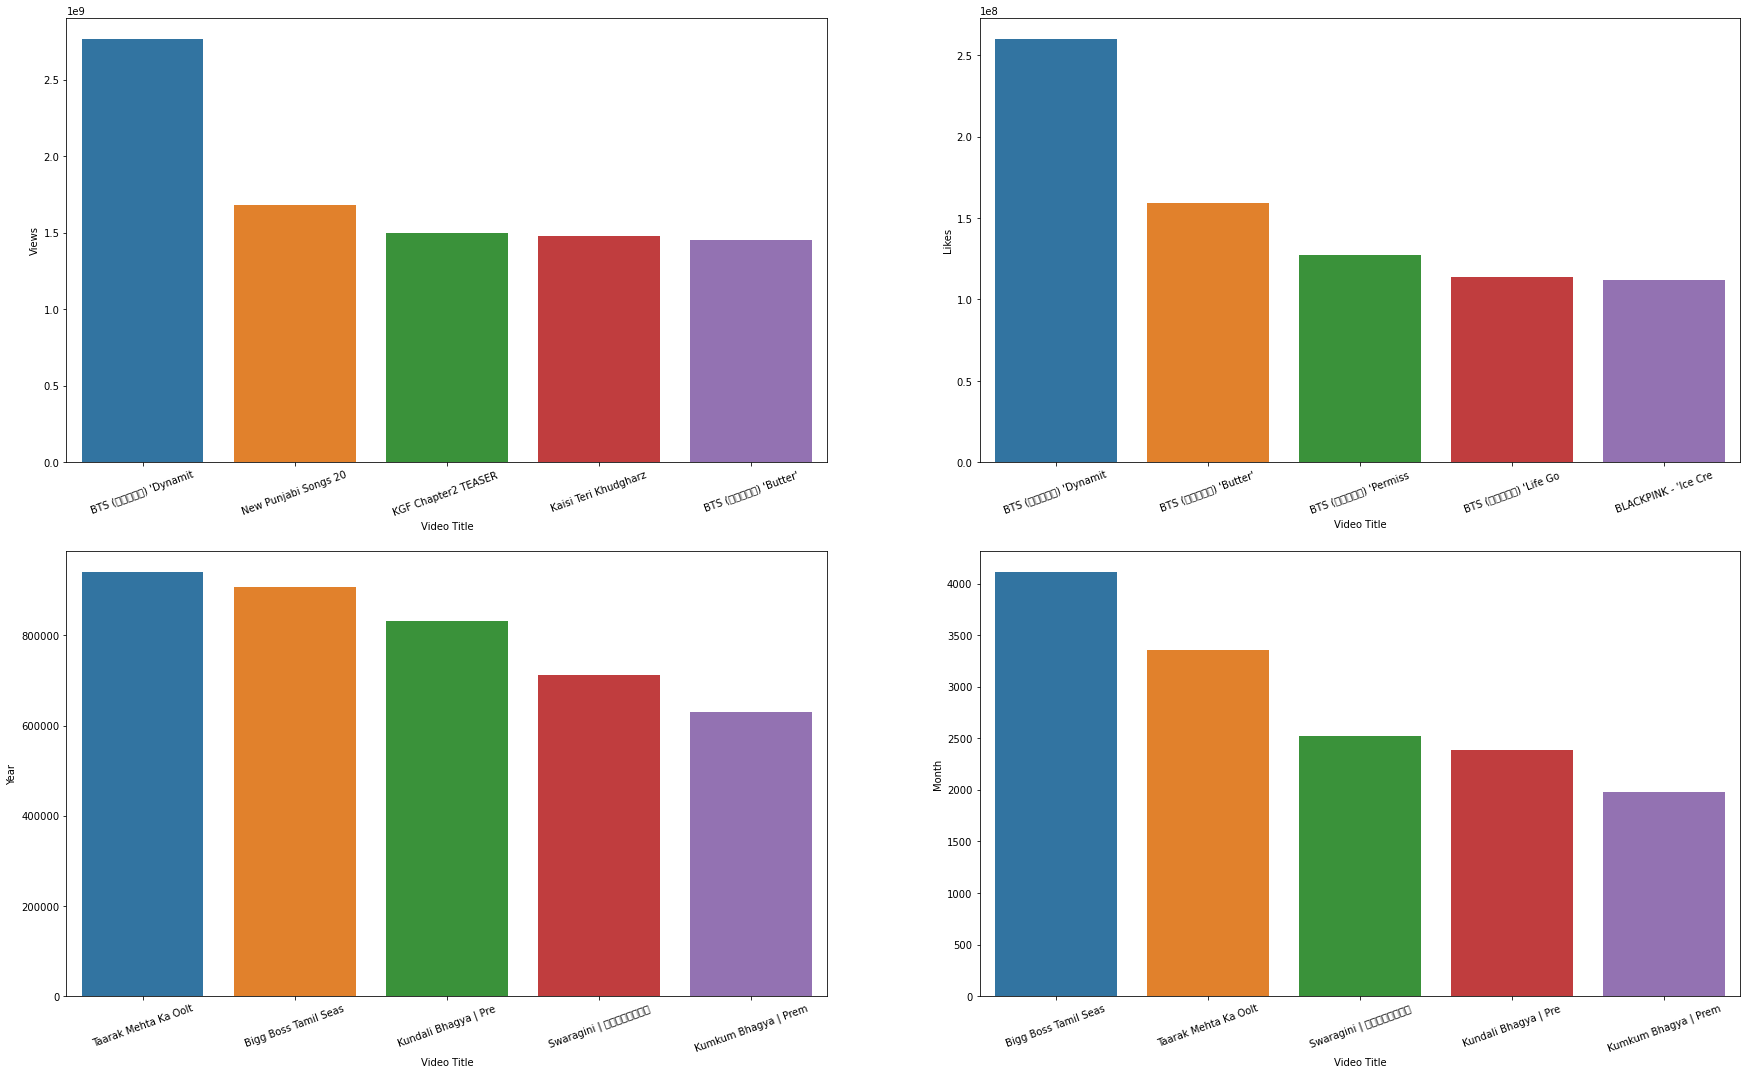

In [48]:
# Bar graph
plt.figure(figsize = (30,18))
plt.subplot(2,2,1)

cols = ['view_count','likes','year','month']
y_axis = ['Views','Likes','Year','Month']

for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.xticks(rotation=20)
    x = df_trending_1[cols[i]].nlargest(5).index
    y = df_trending_1[cols[i]].nlargest(5)
    sns.barplot(x,y)
    plt.ylabel(y_axis[i])
    plt.xlabel("Video Title")

Graphs

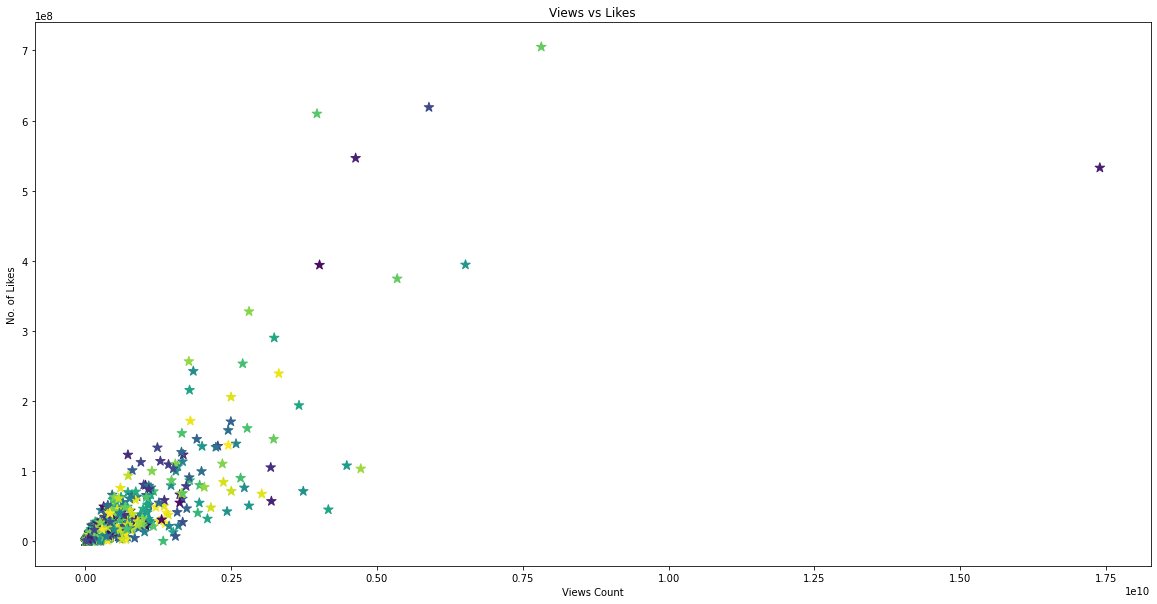

In [49]:
fig = plt.figure()
fig.set_size_inches(20, 10)
plt.scatter(df_channel_1['view_count'],df_channel_1['likes'],s=100, c=np.random.rand(4063), marker='*')
plt.title('Views vs Likes')
plt.xlabel('Views Count')
plt.ylabel('No. of Likes')
plt.show()

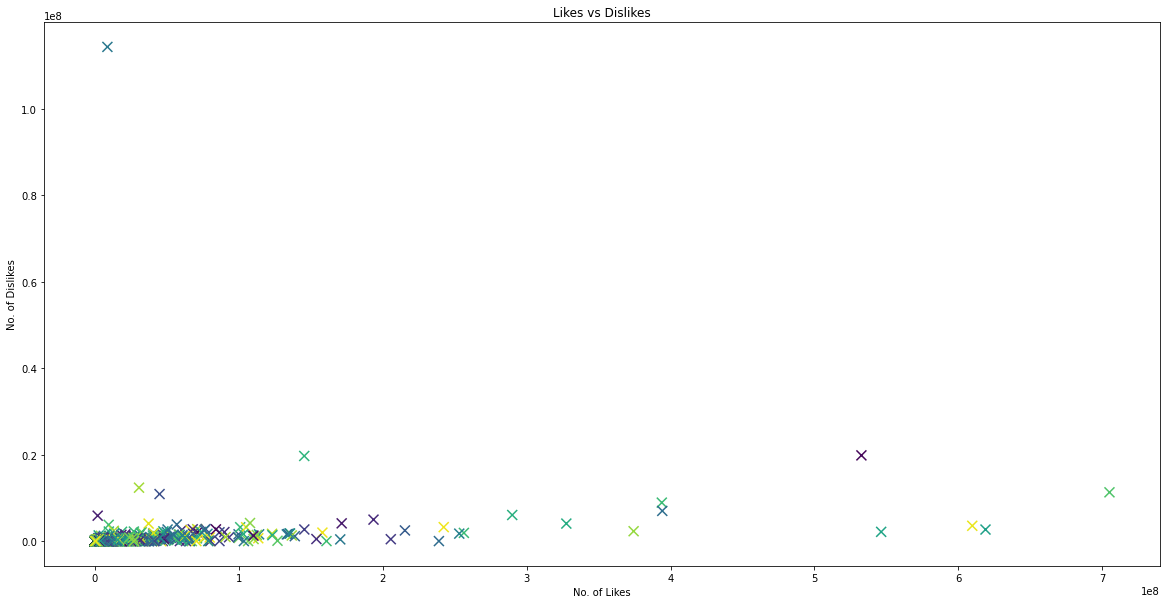

In [50]:
fig = plt.figure()
fig.set_size_inches(20, 10)
plt.scatter(df_channel_1['likes'],df_channel_1['dislikes'],s=100, c=np.random.rand(4063), marker='x')
plt.title('Likes vs Dislikes')
plt.xlabel('No. of Likes')
plt.ylabel('No. of Dislikes')
plt.show()

# Top 100 videos 

In [51]:
top50v = """SELECT view_count, title_short, categoryId FROM df_trending ORDER BY view_count desc LIMIT 100"""
views50v = ps.sqldf(top50v, locals())

top50l = """SELECT likes, title_short, categoryId FROM df_trending ORDER BY view_count desc LIMIT 100"""
views50l = ps.sqldf(top50l, locals())

top50c = """SELECT comment_count, title_short, categoryId FROM df_trending ORDER BY view_count desc LIMIT 100"""
views50c = ps.sqldf(top50c, locals())

In [52]:
views50v

view_count           title_short  categoryId
0    264407389  BTS (방탄소년단) 'Butter'          10
1    253995993  BTS (방탄소년단) 'Dynamit          10
2    244507902  BTS (방탄소년단) 'Dynamit          10
3    232649205  BTS (방탄소년단) 'Dynamit          10
4    219110491  BTS (방탄소년단) 'Dynamit          10
..         ...                   ...         ...
95   118872753  BLACKPINK - 'Ice Cre          10
96   118581029  Tom and Jerry (Anu&R          24
97   118307767  Wakt wakt ki baat h           22
98   117832430  Turn into orbeez - T          24
99   117733981  Guru Randhawa: Nain           10

[100 rows x 3 columns]

In [53]:
views50l

likes           title_short  categoryId
0   16021542  BTS (방탄소년단) 'Butter'          10
1   16115240  BTS (방탄소년단) 'Dynamit          10
2   15948359  BTS (방탄소년단) 'Dynamit          10
3   15735551  BTS (방탄소년단) 'Dynamit          10
4   15460834  BTS (방탄소년단) 'Dynamit          10
..       ...                   ...         ...
95  10370493  BLACKPINK - 'Ice Cre          10
96   4143902  Tom and Jerry (Anu&R          24
97   7892579  Wakt wakt ki baat h           22
98   4197453  Turn into orbeez - T          24
99    885880  Guru Randhawa: Nain           10

[100 rows x 3 columns]

In [54]:
views50c

comment_count           title_short  categoryId
0         6738565  BTS (방탄소년단) 'Butter'          10
1         6249727  BTS (방탄소년단) 'Dynamit          10
2         6188781  BTS (방탄소년단) 'Dynamit          10
3         6064883  BTS (방탄소년단) 'Dynamit          10
4         5810606  BTS (방탄소년단) 'Dynamit          10
..            ...                   ...         ...
95        2569642  BLACKPINK - 'Ice Cre          10
96              0  Tom and Jerry (Anu&R          24
97          11623  Wakt wakt ki baat h           22
98           1461  Turn into orbeez - T          24
99         119205  Guru Randhawa: Nain           10

[100 rows x 3 columns]

Top 50 videos by top 5 category (Entertainment, Music, Videoblogging, Comedy, Gaming)

In [55]:
top50Ent = """SELECT view_count, title_short FROM df_trending WHERE categoryId = 24 ORDER BY view_count desc LIMIT 50"""
views50Ent = ps.sqldf(top50Ent, locals())

top50Mus = """SELECT view_count, title_short FROM df_trending WHERE categoryId = 10 ORDER BY view_count desc LIMIT 50"""
views50Mus = ps.sqldf(top50Mus, locals())

top50Vid = """SELECT view_count, title_short FROM df_trending WHERE categoryId = 19 ORDER BY view_count desc LIMIT 50"""
views50Vid = ps.sqldf(top50Vid, locals())

top50Com = """SELECT view_count, title_short FROM df_trending WHERE categoryId = 23 ORDER BY view_count desc LIMIT 50"""
views50Com = ps.sqldf(top50Com, locals())

top50Gam = """SELECT view_count, title_short FROM df_trending WHERE categoryId = 20 ORDER BY view_count desc LIMIT 50"""
views50Gam = ps.sqldf(top50Gam, locals())

In [56]:
views50Ent

view_count           title_short
0    156704924  KGF Chapter2 TEASER 
1    155477307  KGF Chapter2 TEASER 
2    153966779  KGF Chapter2 TEASER 
3    151980571  KGF Chapter2 TEASER 
4    149288521  KGF Chapter2 TEASER 
5    145479166  KGF Chapter2 TEASER 
6    144239829  Turn into orbeez - T
7    140617212  KGF Chapter2 TEASER 
8    137308926  When the cheating we
9    137192365  When the cheating we
10   136708498  When the cheating we
11   133923118  KGF Chapter2 TEASER 
12   131645297  Tom and Jerry (Anu&R
13   131108950  She is foxy but not 
14   130743617  $456,000 Squid Game 
15   129487713  When the cheating we
16   126907932  She is foxy but not 
17   126153825  Tom and Jerry (Anu&R
18   124957508  KGF Chapter2 TEASER 
19   123003746  She is foxy but not 
20   122021654  $456,000 Squid Game 
21   119521689  She is foxy but not 
22   118581029  Tom and Jerry (Anu&R
23   117832430  Turn into orbeez - T
24   117338711  When the cheating we
25   114630273  She is foxy but not 
26   110512337  $456,000 Squid Game 
27   110081471  KGF Chapter2 TEASER 
28   108237341  She is foxy but not 
29   103931096  Tom and Jerry (Anu&R
30   100949001  Don’t be Oversmart 😎
31   100401114  When the cheating we
32    98357883  Don’t be Oversmart 😎
33    95497997  Turn into egg - Tuto
34    95447265  Don’t be Oversmart 😎
35    93945925  isko mere chupaye hu
36    93648746  Jiska koi nhi hota u
37    92004215  Turn into egg - Tuto
38    91383684  Don’t be Oversmart 😎
39    90820263  She is foxy but not 
40    88526001  Turn into egg - Tuto
41    87847902  Ghareeb Baap aur Khi
42    87280374  Turn into orbeez - T
43    85834964  This is impossible! 
44    85638442  isko mere chupaye hu
45    84983219  Turn into egg - Tuto
46    84164366  Jiska koi nhi hota u
47    84119368  Don’t be Oversmart 😎
48    83121562  Why Children are con
49    82212912  Turn into egg - Tuto

In [57]:
views50Mus

view_count           title_short
0    264407389  BTS (방탄소년단) 'Butter'
1    253995993  BTS (방탄소년단) 'Dynamit
2    244507902  BTS (방탄소년단) 'Dynamit
3    232649205  BTS (방탄소년단) 'Dynamit
4    219110491  BTS (방탄소년단) 'Dynamit
5    208581468  BTS (방탄소년단) 'Dynamit
6    202091414  Filhaal2 Mohabbat | 
7    200692965  BTS (방탄소년단) 'Dynamit
8    187922090  BLACKPINK - ‘Pink Ve
9    187018806  Filhaal2 Mohabbat | 
10   184778248  BLACKPINK - 'Ice Cre
11   183414472  BTS (방탄소년단) 'Dynamit
12   179634853  Filhaal2 Mohabbat | 
13   176694088  BLACKPINK - ‘Pink Ve
14   176467113  BLACKPINK - 'Ice Cre
15   167334429  BLACKPINK - 'Ice Cre
16   166895681  BTS (방탄소년단) 'Butter'
17   163821398  BLACKPINK - ‘Pink Ve
18   162473728  BTS (방탄소년단) 'Permiss
19   161848202   LISA - 'LALISA' M/V
20   160520905  BTS (방탄소년단) 'Dynamit
21   160029127  Filhaal2 Mohabbat | 
22   157578691  BLACKPINK - 'Ice Cre
23   156482499  BTS (방탄소년단) 'Permiss
24   154134590   LISA - 'LALISA' M/V
25   150917891  Filhaal2 Mohabbat | 
26   150622781  BTS (방탄소년단) 'Life Go
27   149052229  BTS (방탄소년단) 'Permiss
28   148006675  BLACKPINK - ‘Pink Ve
29   147138016  BLACKPINK - 'Ice Cre
30   146408342  BTS (방탄소년단) 'Life Go
31   145411916   LISA - 'LALISA' M/V
32   141428767  BTS (방탄소년단) 'Life Go
33   140685439  BLACKPINK – ‘Lovesic
34   140638309  BTS (방탄소년단) 'Permiss
35   136155442  BTS (방탄소년단) 'Life Go
36   135854126   LISA - 'LALISA' M/V
37   134856366  BLACKPINK - 'Ice Cre
38   133484128  BTS (방탄소년단) 'Butter'
39   132678906  BLACKPINK – ‘Lovesic
40   132668221  Filhaal2 Mohabbat | 
41   131225121  BTS (방탄소년단) 'Permiss
42   130757195  BTS (방탄소년단) 'Life Go
43   130124523  Guru Randhawa: Nain 
44   129575030  Guru Randhawa: Nain 
45   128732718  BLACKPINK - ‘Pink Ve
46   126375269  BTS (방탄소년단) 'Dynamit
47   124180499  BLACKPINK – ‘Lovesic
48   124097287   LISA - 'LALISA' M/V
49   121487843  BTS (방탄소년단) 'Life Go

In [58]:
views50Vid

view_count           title_short
0     40533294  “Bhai ka farz har ka
1     34302931  “Bhai ka farz har ka
2     26378601  “Bhai ka farz har ka
3     19029400  “Bhai ka farz har ka
4     13621022  #miniglovevlog Day 2
5     13385589  #miniglovevlog Day 2
6     13162608  Best Halwaa in the w
7     13118762  Best Halwaa in the w
8     13037934  Kamse bachna seekho 
9     12998534  Best Halwaa in the w
10    12931265  #miniglovevlog Day 2
11    12828015  Best Halwaa in the w
12    12366961  “Bhai ka farz har ka
13    12339704  Best Halwaa in the w
14    11546933  Best Halwaa in the w
15    10848547  The Sneaky Food Trap
16    10449458  She Owns 10 Private 
17    10242092  The Sneaky Food Trap
18    10118392  Bihari Parents and N
19     9911644  Bihari Parents and N
20     9671807  Best Halwaa in the w
21     9469846  #MiniGloveVlog Day 0
22     9416885  The Sneaky Food Trap
23     9390325  Bihari Parents and N
24     9010659  The Secret, Incredib
25     8913534  #MiniGloveVlog Day 0
26     8900906  #miniglovevlog day 2
27     8652417  #miniglovevlog day 1
28     8645862  #miniglovevlog Day 2
29     8635882  #miniglovevlog Day 2
30     8562921  “Bhai ka farz har ka
31     8537948  #MiniGloveVlog Day 0
32     8216011  #MiniGloveVlog Day 0
33     8071794  Bihari Parents and N
34     8037223  #miniglovevlog day 2
35     8036053  #miniglovevlog day 1
36     8024909  #MiniGloveVlog Day 0
37     7591484  The Sneaky Food Trap
38     7492886  #MiniGloveVlog Day 0
39     7417288  #miniglovevlog day17
40     7394082  She Owns 10 Private 
41     7329251  #miniglovevlog Day 2
42     7118045  #miniglovevlog Day 1
43     6933153  #miniglovevlog day 1
44     6931750  #MiniGloveVlog Day 0
45     6840656  The Secret, Incredib
46     6750087  #MiniGloveVlog Day 0
47     6701690  #miniglovevlog Day 1
48     6576944  #miniglovevlog Day 3
49     6413943  #miniglovevlog Day 2

In [59]:
views50Com

view_count           title_short
0     84994444  OMG Hot burger! 😂 #s
1     82750312  कामवाली बाई और विराट
2     82249593  OMG Hot burger! 😂 #s
3     82048943  नींबू पानी नहीं मिले
4     80320266  नींबू पानी नहीं मिले
5     80194737  कामवाली बाई और विराट
6     79070855  OMG Hot burger! 😂 #s
7     78849925  If Cleaning was a Ti
8     78296673  नींबू पानी नहीं मिले
9     76784658  कामवाली बाई और विराट
10    75421003  नींबू पानी नहीं मिले
11    74270675  OMG Hot burger! 😂 #s
12    74239290  Insaniyat shayad ab 
13    72586686  Insaniyat shayad ab 
14    71250129  कामवाली बाई और विराट
15    71158775  नींबू पानी नहीं मिले
16    70983815  Insaniyat shayad ab 
17    69627169  If Cleaning was a Ti
18    69344213  Insaniyat shayad ab 
19    67952296  Insaniyat shayad ab 
20    67638808  OMG Hot burger! 😂 #s
21    67350372  A STORY ABOUT GREED 
22    67083668  Don't Let the Ball T
23    66372064  Heart touching plz e
24    65233349  Jeans का जुगाड़ 🤣 | K
25    64991290  My hidden talent #sh
26    64554272  Insaniyat shayad ab 
27    64180019  कामवाली बाई और विराट
28    63408220  Heart touching plz e
29    63272629  नींबू पानी नहीं मिले
30    62885609  My hidden talent #sh
31    62595320  Jeans का जुगाड़ 🤣 | K
32    61002062  A STORY ABOUT GREED 
33    60763502  My hidden talent #sh
34    60541664  MINGWEIROCKS - Eatin
35    60353812  Heart touching plz e
36    59723947  Sisters और Chocolate
37    58894044  OMG Hot burger! 😂 #s
38    58885779  Jeans का जुगाड़ 🤣 | K
39    58509256  My hidden talent #sh
40    56893918  Heart touching plz e
41    56767917  MINGWEIROCKS - Eatin
42    55739691  My hidden talent #sh
43    55451598  If Cleaning was a Ti
44    55370882  Sisters और Chocolate
45    55323208  Don't Let the Ball T
46    53535333  कामवाली बाई और विराट
47    53208443  Jeans का जुगाड़ 🤣 | K
48    52864910  Heart touching plz e
49    52702949  A STORY ABOUT GREED

In [60]:
views50Gam

view_count           title_short
0     72699576  Money Plinko Challen
1     72681293  Money Plinko Challen
2     72584725  Money Plinko Challen
3     72506137  Money Plinko Challen
4     72329148  Money Plinko Challen
5     63696355  Money Plinko Challen
6     58390869  Kill Chori ft. Shrad
7     56937579  Kill Chori ft. Shrad
8     54579831  Kill Chori ft. Shrad
9     50743394  Kill Chori ft. Shrad
10    45465783  Kill Chori ft. Shrad
11    36788619  Free Fire Holi Music
12    35442808        hi, I'm Dream.
13    35424887  Free Fire Holi Music
14    34533325  Kill Chori ft. Shrad
15    33865779        hi, I'm Dream.
16    32300107  Free Fire Holi Music
17    31942024  [HINDI] Free Fire In
18    31839721  [HINDI] Free Fire In
19    31804006        hi, I'm Dream.
20    31644111  [HINDI] Free Fire In
21    31430757  [HINDI] Free Fire In
22    31115923  [HINDI] Free Fire In
23    31092015  [HINDI] Free Fire In
24    30247123  [HINDI] Free Fire In
25    30179650  LOST & CROWNED | A C
26    29791126  LOST & CROWNED | A C
27    29281560  LOST & CROWNED | A C
28    28703674  LOST & CROWNED | A C
29    28136732        hi, I'm Dream.
30    27928368  CLASHIVERSARY is Alm
31    27841245  LOST & CROWNED | A C
32    24736516  Kill Chori ft. Shrad
33    23847944  Party Like A Queen! 
34    23456808  🔴 [HINDI] Free Fire 
35    23429681  🔴 [HINDI] Free Fire 
36    23424448  🔴 [HINDI] Free Fire 
37    23386219  🔴 [HINDI] Free Fire 
38    23362444  🔴 [HINDI] Free Fire 
39    23242214  🔴 [HINDI] Free Fire 
40    22483931  Free Fire Holi Music
41    22286693  Party Like A Queen! 
42    21902418  DELHI MINI VLOG-PART
43    21719635  CLASHIVERSARY is Alm
44    21036875  Hotel games!! Money 
45    20833444  Hotel games!! Money 
46    20764314  Goodbye Old Stuff! H
47    20404254  Goodbye Old Stuff! H
48    20119293  Bass drop challenge!
49    19874098  Hotel games!! Money

Text(0, 0.5, 'Comments count')

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 48169 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 53444 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 49548 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 45380 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 45800 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 128681 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

Glyph 48169 missing from current font.

C:\Users\ABC\anaconda3\lib\site-p

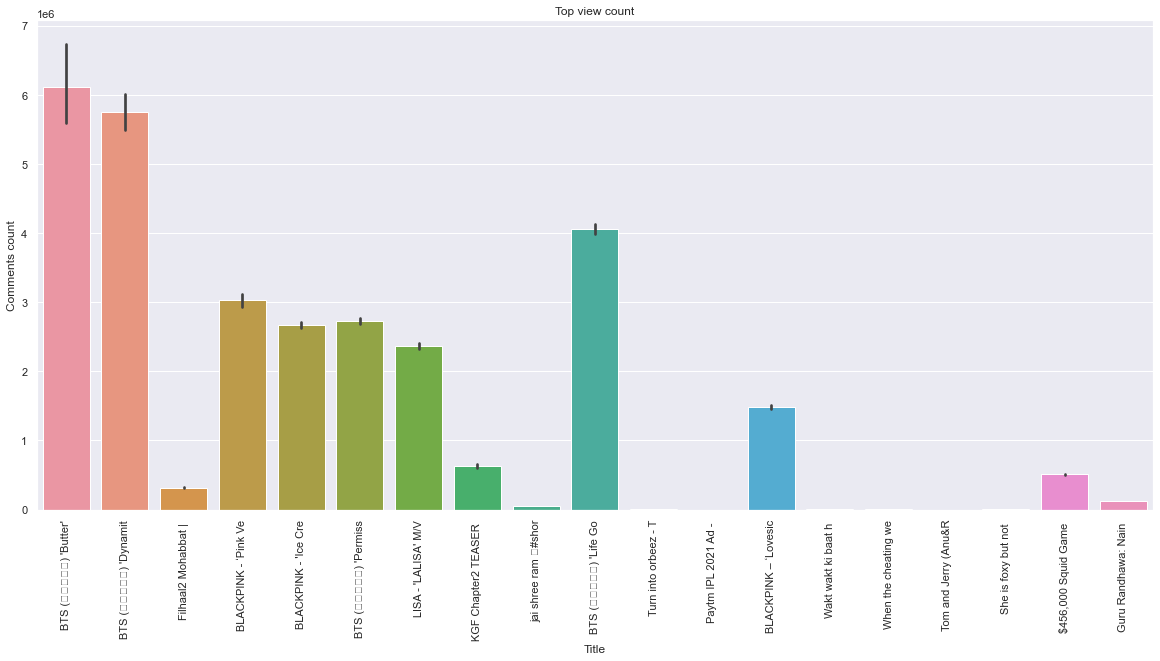

In [61]:
# Bar Graph
sns.set(rc={'figure.figsize':(20,9)})
sns.barplot(data=views50c, 
             x='title_short',
             y = 'comment_count').set(title='Top view count')
plt.xticks(rotation=90)
plt.xlabel("Title")
plt.ylabel("Comments count")

Text(0, 0.5, 'Likes')

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 48169 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 53444 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 49548 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 45380 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 45800 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 128681 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

Glyph 48169 missing from current font.

C:\Users\ABC\anaconda3\lib\site-p

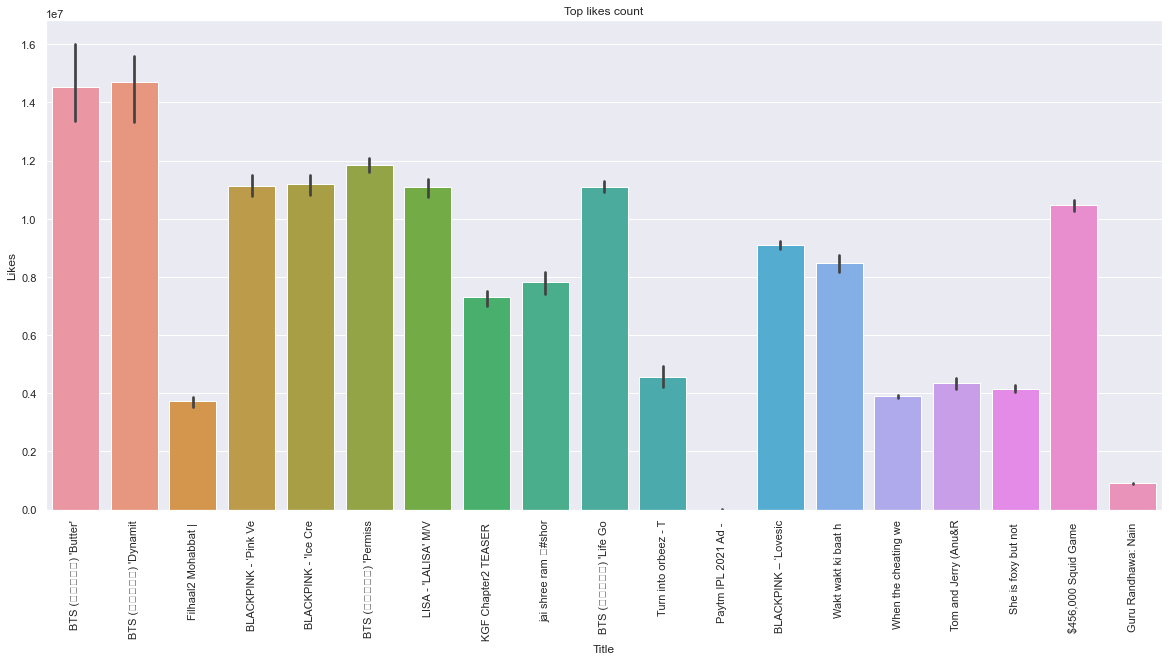

In [62]:
# Bar Graph
sns.set(rc={'figure.figsize':(20,9)})
sns.barplot(data=views50l, 
             x='title_short',
             y = 'likes').set(title='Top likes count')
plt.xticks(rotation=90)
plt.xlabel("Title")
plt.ylabel("Likes")

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 48169 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 53444 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 49548 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 45380 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 45800 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 128681 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

Glyph 48169 missing from current font.

C:\Users\ABC\anaconda3\lib\site-p

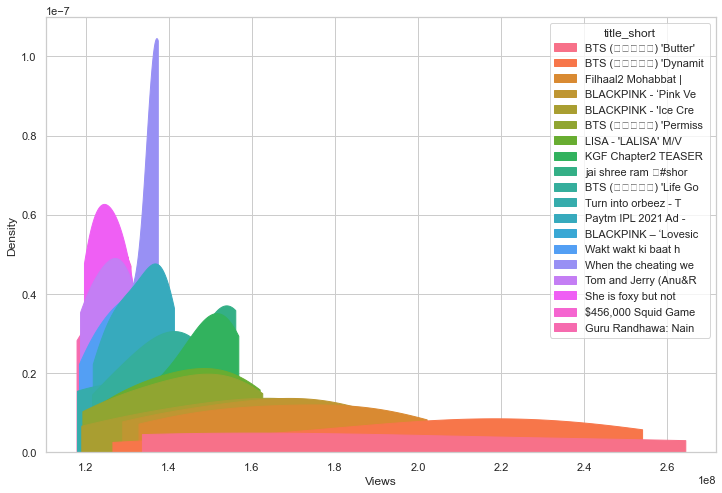

In [63]:
# Area plot
plt.rcParams["figure.figsize"]=12,8
sns.set(style="whitegrid")
sns.kdeplot(data=views50v, x='view_count', hue="title_short", cut=0, fill=True, common_norm=False, alpha=1)
plt.xlabel("Views")
plt.show()

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 128526 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

Glyph 128526 missing from current font.



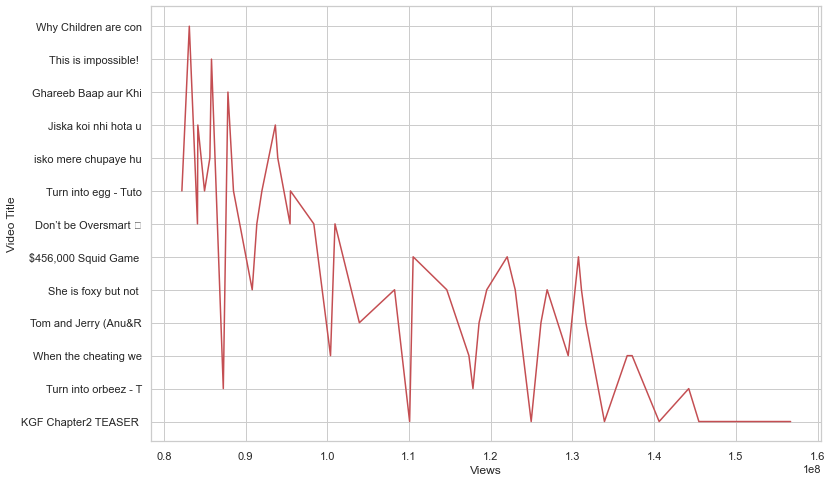

In [64]:
# Entertainment top videos
# Line graph
plt.plot(views50Ent['view_count'], views50Ent['title_short'],color='r')
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.show()

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 48169 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 53444 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 49548 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 45380 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 45800 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

Glyph 48169 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

Glyph 53444 missing from current font.

C:\Users\ABC\anaconda3\lib\site-pa

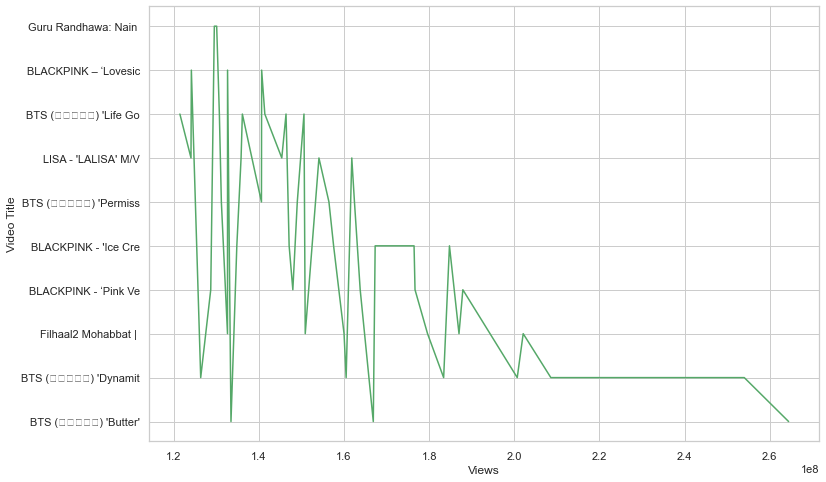

In [65]:
# Music Top Videos
plt.plot(views50Mus['view_count'], views50Mus['title_short'],color='g')
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.show()

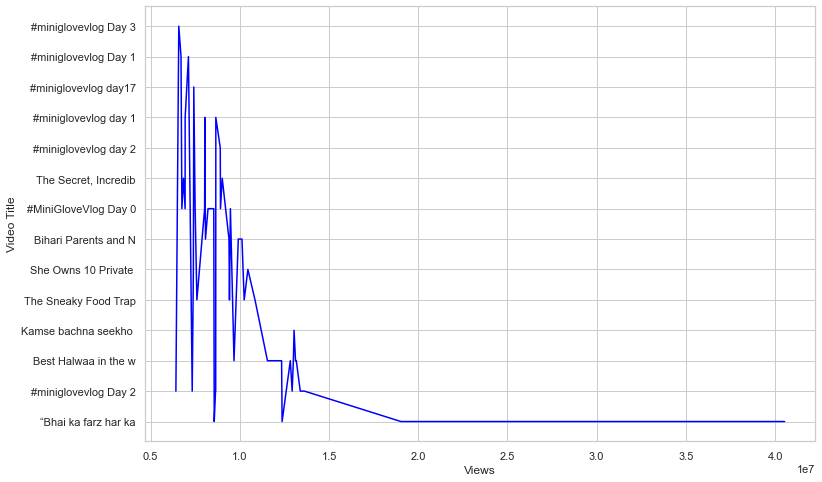

In [66]:
# Videoblogging Top Videos
plt.plot(views50Vid['view_count'], views50Vid['title_short'],color='blue')
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.show()

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 128514 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 2325 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 2366 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 2350 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 2357 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 2354 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 2368 missing from current font.

C:\Users\ABC\anaconda3\lib\site-package

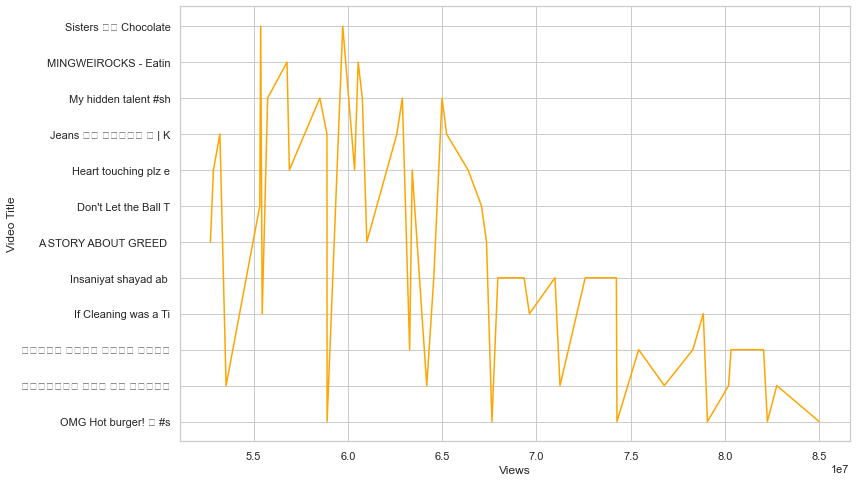

In [67]:
# Comedy Top Videos
plt.plot(views50Com['view_count'], views50Com['title_short'],color='orange')
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.show()

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 128308 missing from current font.

C:\Users\ABC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

Glyph 128308 missing from current font.



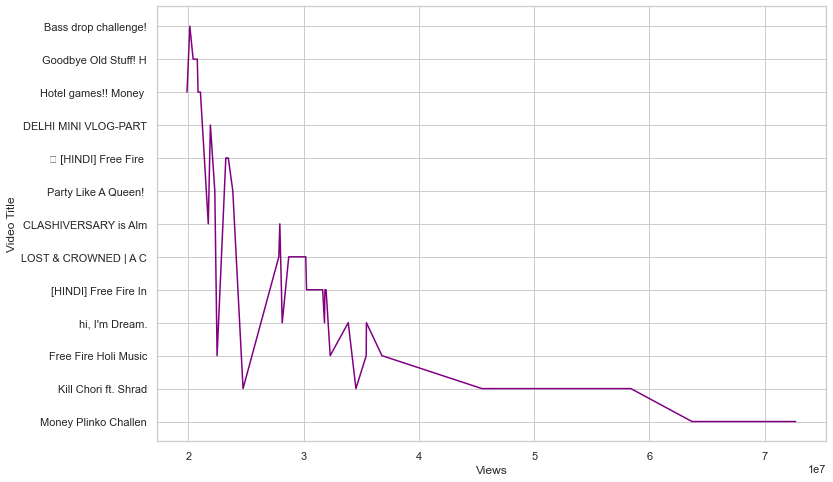

In [68]:
# Gaming Top Videos
plt.plot(views50Gam['view_count'], views50Gam['title_short'],color='purple')
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.show()